In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# 设定的超参数
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# 构造一些数据
train_X = numpy.asarray([-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
train_Y = numpy.asarray([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
n_samples = train_X.shape[0]

Epoch: 0050 cost= 0.059264578 W= 0.133466 b= 0.208202
Epoch: 0100 cost= 0.034184635 W= 0.242644 b= 0.202495
Epoch: 0150 cost= 0.026378101 W= 0.304589 b= 0.198348
Epoch: 0200 cost= 0.022327067 W= 0.349349 b= 0.194942
Epoch: 0250 cost= 0.019744094 W= 0.385115 b= 0.191982
Epoch: 0300 cost= 0.017907377 W= 0.415279 b= 0.189328
Epoch: 0350 cost= 0.016510751 W= 0.441579 b= 0.186902
Epoch: 0400 cost= 0.015399648 W= 0.465034 b= 0.184655
Epoch: 0450 cost= 0.014486504 W= 0.486293 b= 0.182554
Epoch: 0500 cost= 0.013717512 W= 0.505797 b= 0.180575
Epoch: 0550 cost= 0.013057460 W= 0.523865 b= 0.1787
Epoch: 0600 cost= 0.012482281 W= 0.540727 b= 0.176917
Epoch: 0650 cost= 0.011974705 W= 0.556565 b= 0.175212
Epoch: 0700 cost= 0.011522160 W= 0.571518 b= 0.173578
Epoch: 0750 cost= 0.011115134 W= 0.585697 b= 0.172009
Epoch: 0800 cost= 0.010746328 W= 0.599191 b= 0.170498
Epoch: 0850 cost= 0.010409860 W= 0.612079 b= 0.169038
Epoch: 0900 cost= 0.010101232 W= 0.624421 b= 0.167627
Epoch: 0950 cost= 0.009816715 

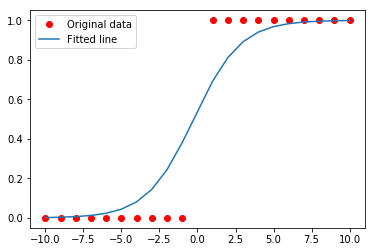

In [7]:
# tf 计算图的 输入
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 设定模型权重
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
# 构建一个逻辑回归模型
Wx_add_b = W*X + b
pred = tf.sigmoid(Wx_add_b)
# 均方误差
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 初始化变量
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    # 拟合训练数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #每个epoch输出信息
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    prediction_value = sess.run(pred,feed_dict={X:train_X})
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, prediction_value, label='Fitted line')
    plt.legend()
    plt.show()